## Linear Classification with a Perceptron

In [1]:
from sklearn import datasets

random_state = 47
x, y = datasets.make_classification(n_features=1, n_redundant=0,
                                    n_informative=1, n_classes=2,
                                    n_clusters_per_class=1, n_samples=100)

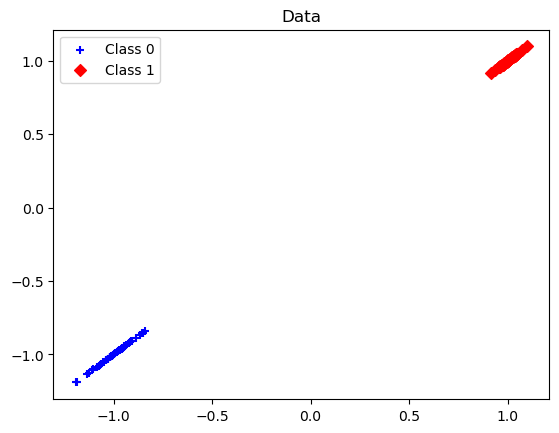

In [2]:
import matplotlib.pyplot as plt

def split_classes(x, y):
    x_0=[]
    x_1=[]
    y_0=[]
    y_1=[]
    for i in range(0, len(x)):
        if y[i] == 0:
            x_0.append(x[i])
            y_0.append(y[i])
        else:
            x_1.append(x[i])
            y_1.append(y[i])
    return (x_0, x_1, y_0, y_1)

x_0, x_1, _, _ = split_classes(x, y)
plt.scatter(x_0, x_0, color= 'blue', marker='+')
plt.scatter(x_1, x_1, color= 'red', marker='D')

plt.title('Data')
plt.legend(['Class 0', 'Class 1'])
plt.show()

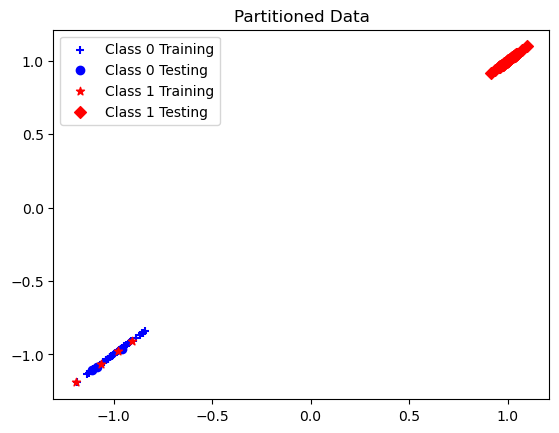

In [3]:
from sklearn import model_selection


x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=random_state)

x_train_0, x_train_1, y_train_0, y_train_1 = split_classes(x_train, y_train)
x_test_0, x_test_1, y_test_0, y_test_1 = split_classes(x_test, y_train)


plt.scatter(x_train_0, x_train_0, color= 'blue', marker='+')

plt.scatter(x_test_0, x_test_0, color= 'blue', marker='o')

plt.scatter(x_test_1, x_test_1, color= 'red', marker='*')

plt.scatter(x_train_1, x_train_1, color= 'red', marker='D')


plt.title('Partitioned Data')

plt.legend(['Class 0 Training', 'Class 0 Testing', 'Class 1 Training', 'Class 1 Testing'])

plt.show()

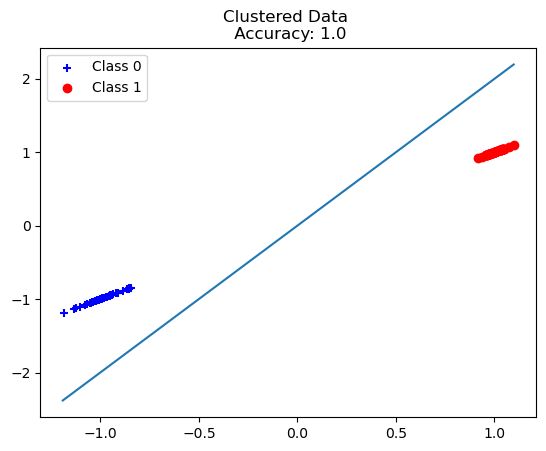

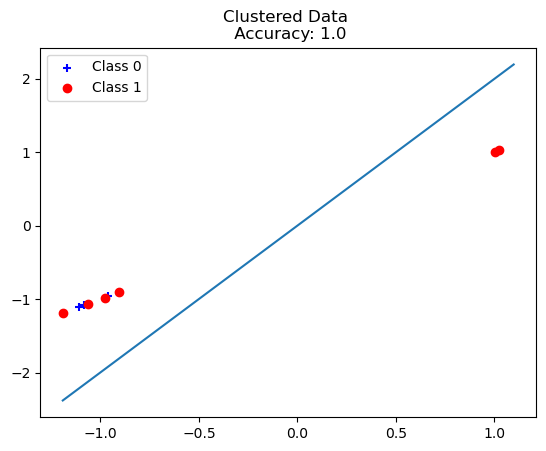

In [4]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np

per = linear_model.Perceptron()
per.fit(x_train, y_train)

x_plot = np.linspace(min(x), max(x))
y_train_pred = per.intercept_ + x_plot * per.coef_[0, 0]

plt.scatter(x_train_0, x_train_0, color= 'blue', marker='+')
plt.scatter(x_train_1, x_train_1, color= 'red', marker='o')
plt.plot(x_plot, y_train_pred)
y_pred_train = per.predict(x_train)
train_accuraccy = metrics.accuracy_score(y_train, y_pred_train, normalize=True)
plt.title(f'Clustered Data \n Accuracy: {train_accuraccy}')
plt.legend(['Class 0', 'Class 1'])
plt.show()

plt.scatter(x_test_0, x_test_0, color= 'blue', marker='+')
plt.scatter(x_test_1, x_test_1, color= 'red', marker='o')
plt.plot(x_plot, y_train_pred)
y_pred_test = per.predict(x_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred_test, normalize=True)
plt.title(f'Clustered Data \n Accuracy: {test_accuracy}')
plt.legend(['Class 0', 'Class 1'])
plt.show()

In [5]:
x_test

array([[ 1.00329554],
       [ 1.02658572],
       [-1.08516423],
       [-0.97858796],
       [-0.90625175],
       [-0.95964211],
       [-1.10854138],
       [-1.19092403],
       [-1.06539844],
       [ 1.02336465]])

In [6]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
y_pred_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1])